- Book: Modern Computer Vision with PyTorch (by V Kishore Ayyadevara)

In [1]:
import torch
import numpy as np

In [2]:
x = torch.tensor([[1, 2]])
y = torch.tensor([[1], [2]])

In [3]:
print(x.shape) # One entity of two items
print(y.shape) # Two entities of one item each
print(x.dtype)

torch.Size([1, 2])
torch.Size([2, 1])
torch.int64


In [4]:
# The entire tensor is coerced to the most generic data type
# Boolean and integer will be converted to float
z = torch.tensor([False, 1, 2.0])
z

tensor([0., 1., 2.])

In [5]:
# Generate three rows and four columns of values between 0 and 10 
# (including the low value but not including the high value):
torch.randint(low = 0, high = 10, size=(3, 4))

tensor([[6, 6, 5, 4],
        [4, 8, 7, 4],
        [5, 2, 3, 9]])

In [6]:
# Generate random numbers between 0 and 1 with three rows and four columns:
torch.rand(3, 4)

tensor([[0.9849, 0.3347, 0.0359, 0.9507],
        [0.5953, 0.9354, 0.9886, 0.0706],
        [0.2765, 0.7761, 0.6845, 0.7257]])

In [7]:
# Generate numbers that follow a normal distribution with three rows 
# and four columns:
torch.randn((3, 4))

tensor([[-1.0306,  0.5267, -0.4937, -0.3433],
        [ 1.5461, -1.8359, -0.6820, -1.2371],
        [-0.0892,  0.0720,  1.1049, -0.8068]])

In [8]:
# Converting a NumPy array into a Torch Tensor
w = np.array([[10, 20, 30], [2, 3, 4]])
t = torch.tensor(w)
print(type(w), type(t))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


In [9]:
print(t * 10)
print(t.add(10))

tensor([[100, 200, 300],
        [ 20,  30,  40]])
tensor([[20, 30, 40],
        [12, 13, 14]])


In [10]:
a = torch.tensor([2, 3, 1, 0])
print(a.view(4, 1))
print(a.view(2, 2))

tensor([[2],
        [3],
        [1],
        [0]])
tensor([[2, 3],
        [1, 0]])


In [11]:
b = torch.randn(10, 1, 10)
b

tensor([[[ 0.3001,  0.3935,  0.3426,  0.5858, -0.8186, -0.5725,  1.2204,
          -1.2701,  1.1452, -1.0914]],

        [[ 1.3420,  1.6341,  1.9246,  0.1690,  1.1529,  0.7251, -0.3221,
          -0.0148, -1.2967,  0.7628]],

        [[-0.1560, -0.4068,  0.2309,  0.6819, -1.6082,  0.0975, -0.7519,
           0.1028, -0.7416, -0.1093]],

        [[ 0.6672, -1.7822, -0.0278, -1.7921,  0.7995,  0.3004,  0.8734,
          -0.0700, -0.9231,  0.0340]],

        [[ 0.6079,  1.3624, -0.7337, -1.2239, -2.4320,  0.9371,  0.0570,
           0.0589, -0.4057,  0.0283]],

        [[-0.6116, -0.9230,  1.3840, -0.9112, -0.8597,  0.1090,  0.2663,
          -0.6295,  0.2484,  1.0828]],

        [[-1.9557,  1.2847, -0.0115,  0.9619,  1.8508,  0.7090,  0.4256,
           1.2222,  2.5250,  1.1731]],

        [[-0.1167, -0.4298,  0.1686,  0.4208, -0.3630,  0.1809, -0.6260,
           1.0841, -1.8940,  0.8860]],

        [[-0.6272, -2.2329,  0.5582,  0.3875,  0.1616,  0.0823, -0.6751,
           0.5345, -2.0

#### Creating a Fake Dimension

In [12]:
c = b.squeeze(1)
c.shape

torch.Size([10, 10])

In [13]:
c1, c2, c3 = c[None], c[:,None], c[:,:,None]
print(c1.shape, c2.shape, c3.shape)

torch.Size([1, 10, 10]) torch.Size([10, 1, 10]) torch.Size([10, 10, 1])


# Gradients

In [14]:
x = torch.tensor([[2., -1.], [1., 1.]], requires_grad=True)
x

tensor([[ 2., -1.],
        [ 1.,  1.]], requires_grad=True)

$out = \sum_{i=1}^{4} x^{2}_i$

In [15]:
out = x.pow(2).sum()
out

tensor(7., grad_fn=<SumBackward0>)

In [16]:
out.backward()

In [17]:
# Gradient of the previous function is 2x
x.grad

tensor([[ 4., -2.],
        [ 2.,  2.]])

# Implementing the Neural Network

In [18]:
# Addition of Two Numbers
# Input
x = [[1, 2], [3, 4], [5, 6], [7, 8]]
# Output
y = [[3], [7], [11], [15]]

In [19]:
x = torch.tensor(x).float()
y = torch.tensor(y).float()

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x = x.to(device)
y = y.to(device)

In [21]:
# Libraries
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
print(nn.Linear(2, 7))

Linear(in_features=2, out_features=7, bias=True)


## Model Architecture

In [23]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8, 1)

    def forward(self, x):
        a = self.input_to_hidden_layer(x)
        b = self.hidden_layer_activation(a)
        c = self.hidden_to_output_layer(b)
        return c

In [24]:
net = MyNeuralNet().to(device)

In [25]:
# Checking the initial weights
net.input_to_hidden_layer.weight

Parameter containing:
tensor([[ 0.3184,  0.0209],
        [ 0.4545,  0.0709],
        [ 0.2515,  0.0427],
        [ 0.7050,  0.0527],
        [ 0.1115, -0.0730],
        [-0.6489, -0.6244],
        [-0.6341, -0.2813],
        [ 0.0354, -0.5548]], requires_grad=True)

In [26]:
# Obtaining the parameters
net.parameters()

<generator object Module.parameters at 0x7f9a303be580>

In [27]:
for par in net.parameters():
    print(par)

Parameter containing:
tensor([[ 0.3184,  0.0209],
        [ 0.4545,  0.0709],
        [ 0.2515,  0.0427],
        [ 0.7050,  0.0527],
        [ 0.1115, -0.0730],
        [-0.6489, -0.6244],
        [-0.6341, -0.2813],
        [ 0.0354, -0.5548]], requires_grad=True)
Parameter containing:
tensor([-0.0900, -0.5369,  0.5942, -0.5002,  0.4604, -0.6288, -0.5055,  0.6828],
       requires_grad=True)
Parameter containing:
tensor([[-0.1658,  0.1974, -0.0462, -0.2021,  0.3331,  0.0514,  0.1286,  0.2590]],
       requires_grad=True)
Parameter containing:
tensor([0.0892], requires_grad=True)


In [28]:
# Mean Squared Error (continuous output)
loss = nn.MSELoss()

In [29]:
_y = net(x)
loss_value = loss(_y, y)
loss_value

tensor(107.3276, grad_fn=<MseLossBackward0>)

In [30]:
# Stochastic Gradient Descent
opt = SGD(net.parameters(), lr = 0.001)

In [31]:
loss_history = []
for _ in range(50):
    # Flush the previous epoch's gradients
    opt.zero_grad()
    # Compute loss
    loss_value = loss(net(x), y)
    # Perform back-propagation
    loss_value.backward()
    # Update the weights according to the gradients computed
    opt.step()
    loss_history.append(loss_value)

Text(0, 0.5, 'Loss Value')

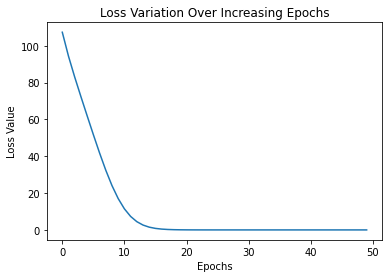

In [32]:
losses = [ loss.detach().numpy() for loss in loss_history]
plt.plot(losses)
plt.title('Loss Variation Over Increasing Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')

# Using Batch Sizes

In [33]:
from torch.utils.data import Dataset, DataLoader
import time

In [34]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]
x = torch.tensor(x).float()
y = torch.tensor(y).float()

In [35]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float()
        self.y = torch.tensor(y).float()

    def __len__(self):
        return len(self.x)

    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

In [36]:
ds = MyDataset(x, y)

<ipython-input-35-94cb611d7f95>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x = torch.tensor(x).float()
<ipython-input-35-94cb611d7f95>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y).float()


In [37]:
dl = DataLoader(ds, batch_size=2, shuffle=True)

In [38]:
# To fetch the batches from dl, we loop through it:
for x, y in dl:
    print(f'x = {x}',f'y = {y}')

x = tensor([[1., 2.],
        [3., 4.]]) y = tensor([[3.],
        [7.]])
x = tensor([[7., 8.],
        [5., 6.]]) y = tensor([[15.],
        [11.]])


In [39]:
net = MyNeuralNet().to(device)
loss = nn.MSELoss()
opt = SGD(net.parameters(), lr = 0.001)

In [40]:
loss_history = []
start = time.time()
for _ in range(50):
    for data in dl:
        x, y = data
        opt.zero_grad()
        loss_value = loss(net(x), y)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value)
end = time.time()
print(end - start)

0.06815528869628906


# Predicting New Data Points

In [41]:
val_x = [[10, 11]]
val_x = torch.tensor(val_x).float().to(device)

In [42]:
net(val_x)

tensor([[21.1943]], grad_fn=<AddmmBackward0>)

# Implementing a Custom Loss Function

In [43]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]
x = torch.tensor(x).float()
y = torch.tensor(y).float()
x = x.to(device)
y = y.to(device)

In [44]:
def my_mean_squared_error(_y, y):
    loss = (_y - y) ** 2
    loss = loss.mean()
    return loss

In [45]:
# Using the built-in function
loss = nn.MSELoss()
loss_value = loss(net(x), y)
loss_value

tensor(0.0108, grad_fn=<MseLossBackward0>)

In [46]:
# Using my function
my_mean_squared_error(net(x), y)

tensor(0.0108, grad_fn=<MeanBackward0>)

# Fetching the Values of Intermediate Layers

In [47]:
input_to_hidden = net.input_to_hidden_layer(x)
hidden_activation = net.hidden_layer_activation(input_to_hidden)
hidden_activation

tensor([[ 1.5162,  1.9890,  0.0000,  1.6689,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 3.2782,  5.1130,  0.0000,  3.6540,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 5.0401,  8.2369,  0.0000,  5.6392,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 6.8021, 11.3609,  0.0000,  7.6243,  0.0000,  0.0000,  0.0000,  0.0000]],
       grad_fn=<ReluBackward0>)

### Another Way

- Return more than one value in the function

```python
def forward(self, x):
        hidden1 = self.input_to_hidden_layer(x)
        hidden2 = self.hidden_layer_activation(hidden1)
        output = self.hidden_to_output_layer(hidden2)
        return output, hidden2
```

- To access the hidden layer values:

```python
net = <class_name>().to(device)
net(x)[1]  # hidden2
```






# Sequential Method

- Other way of creating a Neural Network

In [48]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [49]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]
    def __len__(self): 
        return len(self.x)

In [50]:
ds = MyDataset(x, y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

### Defining the Model Architecture using the Sequential method

In [52]:
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

In [53]:
from torchsummary import summary

In [61]:
summary(model, (1, 2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


- -1 represents that there can be as many data points as the batch size

In [69]:
loss_func = nn.MSELoss()
opt = SGD(model.parameters(), lr = 0.001)
loss_history = []
start = time.time()
for _ in range(50):
    for ix, iy in dl:
        opt.zero_grad()
        loss_value = loss_func(model(ix),iy)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value)
end = time.time()
print(end - start)

0.12270641326904297


In [71]:
val = [[8, 9], [10, 11], [1.5, 2.5]]
model(torch.tensor(val).float().to(device))

tensor([[16.7293],
        [20.5432],
        [ 4.3236]], grad_fn=<AddmmBackward0>)

In [72]:
model.state_dict()

OrderedDict([('0.weight', tensor([[ 0.6577,  0.4167],
                      [ 0.0163,  0.5411],
                      [-0.4313,  0.3788],
                      [-0.3176, -0.3822],
                      [ 0.5068,  0.9300],
                      [-0.3608, -0.0192],
                      [ 0.4405,  0.1938],
                      [-0.3001,  0.5985]])),
             ('0.bias',
              tensor([ 0.3501, -0.2226, -0.0784, -0.2939, -0.0418, -0.1189, -0.5606,  0.0575])),
             ('2.weight',
              tensor([[ 0.4693,  0.3360, -0.0475,  0.2818,  0.8215, -0.1858,  0.0050,  0.1068]])),
             ('2.bias', tensor([0.2089]))])

- The keys are the names of the model's layers and the values correspond to the weights of these layers.

# Saving the Model

In [73]:
torch.save(model.to('cpu').state_dict(), 'model.pth')

# Loading the Model

In [74]:
model = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        ).to(device)

In [76]:
state_dict = torch.load('model.pth')

In [77]:
model.load_state_dict(state_dict)
model.to(device)
model(torch.tensor(val).float().to(device))

tensor([[16.7293],
        [20.5432],
        [ 4.3236]], grad_fn=<AddmmBackward0>)